In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

epoch: 10, loss:  4387.3359
epoch: 20, loss:  3272.3337
epoch: 30, loss:  2465.8953
epoch: 40, loss:  1881.9899
epoch: 50, loss:  1458.7805
epoch: 60, loss:  1151.7535
epoch: 70, loss:  928.8209
epoch: 80, loss:  766.8193
epoch: 90, loss:  649.0087
epoch: 100, loss:  563.2763


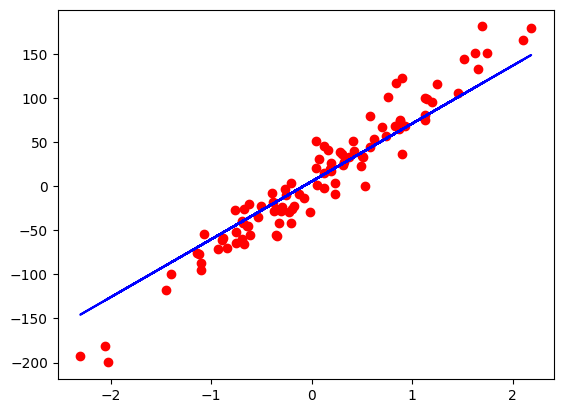

In [7]:
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)  #### ???????????

n_samples, n_features = X.shape

input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion =  nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## training loop
num_epochs=100
for epoch in range(num_epochs):
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10==0:
    print(f'epoch: {epoch+1}, loss: {loss.item(): .4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
